<a href="https://colab.research.google.com/github/rares985/machine-learning/blob/master/binary_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data("mnist.mpz")

11493376/11490434 [==============================] - 0s 0us/step


Since we are implementing binary classification, we are only keeping the two classes for digits $ 0 $ and $ 1 $. Also, we are adding the intercept term as usual:

In [31]:
X_train_binary = X_train[(y_train==0)|(y_train==1)]
y_train_binary = y_train[(y_train==0)|(y_train==1)].reshape(-1,1)

X_test_binary = X_test[(y_test==0)|(y_test==1)]
y_test_binary = y_test[(y_test==0)|(y_test==1)].reshape(-1, 1)

X_train_binary = X_train_binary.reshape(-1, 28*28)
X_test_binary = X_test_binary.reshape(-1, 28*28)
m,n = X_train_binary.shape

X_intercept = np.hstack((np.ones((m, 1)), X_train_binary))
print(X_intercept.shape)


(12665, 785)


Here are the definitions for the *crossentropy* loss function and for the *sigmoid* activation function:

In [0]:
def cross_entropy(predictions, targets, epsilon=1e-12):
    """
    Computes cross entropy between targets (encoded as one-hot vectors)
    and predictions. 
    Input: predictions (N, k) ndarray
           targets (N, k) ndarray        
    Returns: scalar
    """
    predictions = np.clip(predictions, epsilon, 1. - epsilon)
    N = predictions.shape[0]
    ce = -np.sum(targets*np.log(predictions+1e-9))/N
    return ce

def sigmoid(x):                                        
    return 1 / (1 + np.exp(-x))

And now the actual training: Note that the formula is almost identical to linear regression, with the exception that y_hat is now the result of the application of the sigmoid on the product rather than the product itself. We are also plotting the cost function evolution to see whether the regressor is converging.

100%|██████████| 25/25 [00:00<00:00, 33.15it/s]


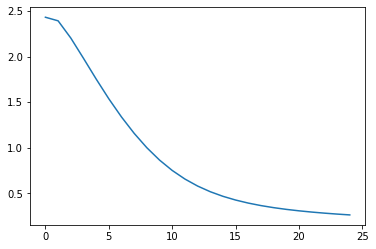

In [41]:
import tqdm
import matplotlib.pyplot as plt

n_epochs = 25
learning_rate = 1e-5

theta = np.random.randn(n+1, 1)*np.sqrt(2/m)


J_hist = []
for n_ep in tqdm.tqdm(range(n_epochs)):
    y_hat = sigmoid(X_intercept @ theta)

    delta = y_hat - y_train_binary
    
    J = cross_entropy(y_hat, y_train_binary)
    J_hist.append(J)

    djdw = (1/m) * X_intercept.T @ delta

    theta -= learning_rate * djdw


plt.plot(J_hist)

And now some predictions: Accuracy seems to be over 90 \%.

In [45]:
X_test_intercept = np.hstack((np.ones((X_test_binary.shape[0], 1)), X_test_binary))
y_pred_binary = sigmoid(X_test_intercept @ theta)

y_pred_labels = np.zeros_like(y_pred_binary)
y_pred_labels[y_pred_binary >= 0.5] = 1



import pandas as pd
df = pd.DataFrame(data={'Predicted': y_pred_labels.reshape(-1, ).astype(np.int32), 'Actual': y_test_binary.reshape(-1,)}).head()

guessed = np.sum(y_pred_labels == y_test_binary)
total = y_test_binary.shape[0]

acc = (guessed / total) * 100

print('Accuracy is: {}'.format(acc))

Accuracy is: 94.60992907801419
